# U.S. College Majors - Data Analysis and Visualizations

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Libraries-and-configuration" data-toc-modified-id="Libraries-and-configuration-2">Libraries and configuration</a></span></li><li><span><a href="#Recent-Graduates-Data-Analysis" data-toc-modified-id="Recent-Graduates-Data-Analysis-3">Recent Graduates Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.1">Data</a></span></li><li><span><a href="#Median-Earnings" data-toc-modified-id="Median-Earnings-3.2">Median Earnings</a></span></li><li><span><a href="#Unemployment-and-Underemployment-Rates" data-toc-modified-id="Unemployment-and-Underemployment-Rates-3.3">Unemployment and Underemployment Rates</a></span></li><li><span><a href="#Outcomes-for-Female-Graduates" data-toc-modified-id="Outcomes-for-Female-Graduates-3.4">Outcomes for Female Graduates</a></span></li></ul></li><li><span><a href="#Women-Graduates-Time-Series-Data-Analysis" data-toc-modified-id="Women-Graduates-Time-Series-Data-Analysis-4">Women Graduates Time Series Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-4.1">Data</a></span></li><li><span><a href="#Gender-Gap-in-Bachelor's-Degrees" data-toc-modified-id="Gender-Gap-in-Bachelor's-Degrees-4.2">Gender Gap in Bachelor's Degrees</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

## Introduction

**Background:**

Student loan debt is a major issue in the U.S., reaching __[<span>&#36;</span>1.5 trillion in 2018](https://www.forbes.com/sites/zackfriedman/2018/06/13/student-loan-debt-statistics-2018/#22d8fef07310)__ and becoming the second highest consumer debt category, only behind mortgage debt. Given that the average graduate has more than <span>&#36;</span>37,000 in student loan debt, choosing the right college major is increasingly critical. 

This project aims to analyze outcomes for U.S. graduates based on their major in terms of earnings and unemployment. Special attention is also given to exploring the gender gap in bachelor's degrees. 

**Goals:**
<ul>
    <li>Examine graduates' yearly earnings based on their majors;</li>
    <li>Determine whether majors impact graduates' unemployment and underemployment rates;</li>
    <li>Find out if majors' outcomes are correlated with the share of women in them;</li>
    <li>Explore the gender gap's evolution in bachelor's degrees from 1970 to 2011.</li>
</ul>

## Libraries and configuration

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Seaborn styling options
sns.set_style("white")
sns.set_context(rc={"font.size":11, "axes.titlesize":14, "axes.labelsize":12})
sns.set_palette("muted")

# Center plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Recent Graduates Data Analysis

### Data

In [9]:
grads_df = pd.read_csv("data/recent-grads.csv")

# Preview of the dataset
grads_df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
grads_df.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [11]:
# Summary statistics
grads_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [12]:
# Remove rows with missing values (to avoid matplotlib errors)
raw_data_count = grads_df.shape[0]
grads_df = grads_df.dropna() # drop rows with missing values
cleaned_data_count = grads_df.shape[0]
print(str(raw_data_count - cleaned_data_count) + " row(s) removed.")

1 row(s) removed.


In [13]:
# Capitalize majors names instead of uppercase
grads_df["Major"] = grads_df["Major"].apply(lambda x: x.capitalize())

### Median Earnings

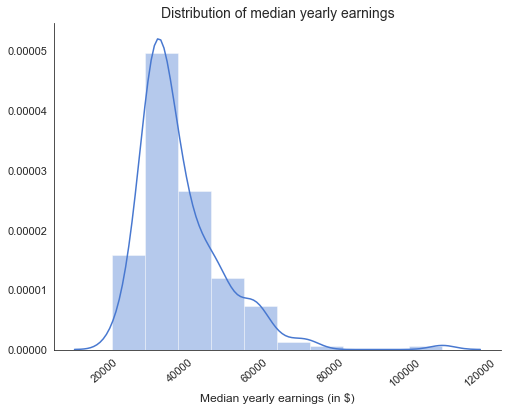

In [39]:
# Median earnings histogram
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(grads_df["Median"], kde = True, bins = 10)
ax.set(xlabel = "Median yearly earnings (in $)", title = "Distribution of median yearly earnings")
plt.xticks(rotation=40)
sns.despine()

**Findings:** The most common median yearly salary range for college graduates is \$30,000-40,000.

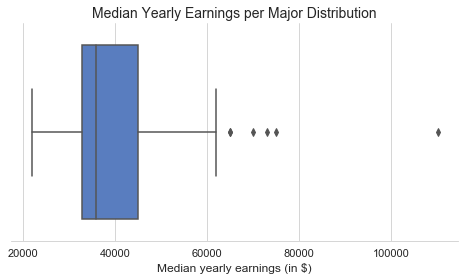

In [15]:
# Median earnings boxplot
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize = (8,4))
    sns.boxplot(x = grads_df["Median"])
    ax.set(xlabel = "Median yearly earnings (in $)", title = "Median Yearly Earnings per Major Distribution")
    sns.despine(left=True)

In [16]:
# Check outlier majors
grads_df[grads_df["Median"] > 62000][["Major", "Median"]]

,Major,Median
0,Petroleum engineering,110000
1,Mining and mineral engineering,75000
2,Metallurgical engineering,73000
3,Naval architecture and marine engineering,70000
4,Chemical engineering,65000
5,Nuclear engineering,65000


**Findings:** 75% of graduates earn between <span>&#36;</span>22,000-45,000. There are 5 outlier engineering majors that pay more than <span>&#36;</span>62,000, with one major paying more than <span>&#36;</span>100,000.

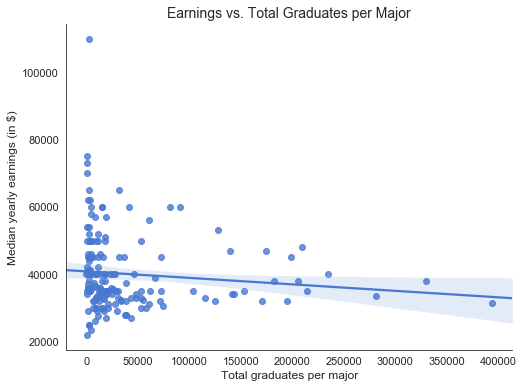

In [17]:
# Compare total number of students to earnings
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = grads_df["Total"], y = grads_df["Median"])
ax.set(xlabel = "Total graduates per major", ylabel = "Median yearly earnings (in $)", 
       title = "Earnings vs. Total Graduates per Major")
sns.despine()

**Findings:** Slight negative correlation: graduates in more popular majors (those with higher numbers of students) seem to have lower earnings.

### Unemployment and Underemployment Rates

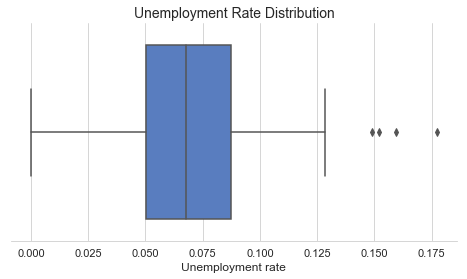

In [18]:
# Unemployment boxplot
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize = (8,4))
    sns.boxplot(x = grads_df["Unemployment_rate"])
    ax.set(xlabel = "Unemployment rate", title = "Unemployment Rate Distribution")
    sns.despine(left=True)

In [19]:
# Check outlier majors
grads_df[grads_df["Unemployment_rate"] > 0.13][["Major", "Unemployment_rate"]]

,Major,Unemployment_rate
5,Nuclear engineering,0.177226
84,Computer networking and telecommunications,0.151850
89,Public administration,0.159491
170,Clinical psychology,0.149048


**Findings:** 75% of majors have an unemployment rate of less than 8.8%. 4 of them have an unemployment rate greater than 14%.

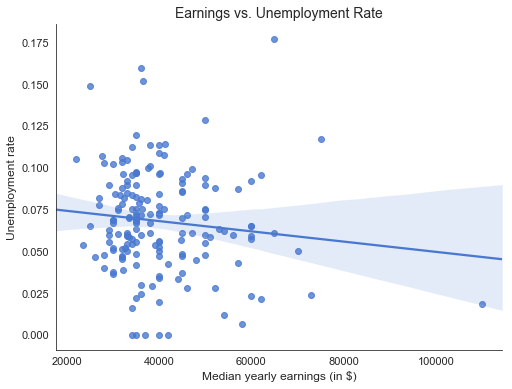

In [22]:
# Compare share of women to unemployment rate
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = grads_df["Median"], y = grads_df["Unemployment_rate"])
ax.set(xlabel = "Median yearly earnings (in $)", ylabel = "Unemployment rate",
       title = "Earnings vs. Unemployment Rate")
sns.despine()

**Findinds:** No clear correlation between majors' median yearly earnings and unemployment rate.

In [24]:
#Add underemployment rates
grads_df["Underemployment"] = grads_df["Non_college_jobs"] / grads_df["Total"] 

# Create new dataframe with 5 highest and 5 lowest paying majors
majors_top_bottom_df = pd.concat([grads_df.head(), grads_df.tail()])
majors_top_bottom_df.loc[:5,"Majors_ranking"] = "Highest paying"
majors_top_bottom_df.loc[5:,"Majors_ranking"] = "Lowest paying"

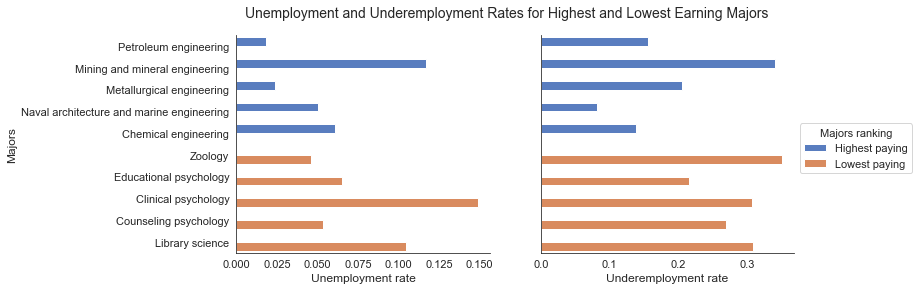

In [25]:
# Compare the highest and lowest paying majors in terms of unemployment and underemployment rates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.suptitle("Unemployment and Underemployment Rates for Highest and Lowest Earning Majors", fontsize = 14)

# Unemployment bar chart
sns.barplot(x = majors_top_bottom_df["Unemployment_rate"], y = majors_top_bottom_df["Major"], 
            hue = majors_top_bottom_df["Majors_ranking"], ax = ax1)
ax1.set(xlabel = "Unemployment rate", ylabel = "Majors",
       )
ax1.legend_.remove()

# Underemployment bar chart
sns.barplot(x = majors_top_bottom_df["Underemployment"], y = majors_top_bottom_df["Major"],
            hue = majors_top_bottom_df["Majors_ranking"], ax = ax2)
ax2.set(xlabel = "Underemployment rate", ylabel = "")
ax2.set_yticklabels([])
ax2.legend(title = "Majors ranking", bbox_to_anchor = (1, .62))

sns.despine()

**Findings:** There appears to be no marked difference in unemployment rates between the highest and lowest majors.

Similarly to unemployment rates, there is no striking difference in underemployment rates between the highest and lowest paying majors. However, graduates from lowest paying majors seem to be slightly more underemployed.

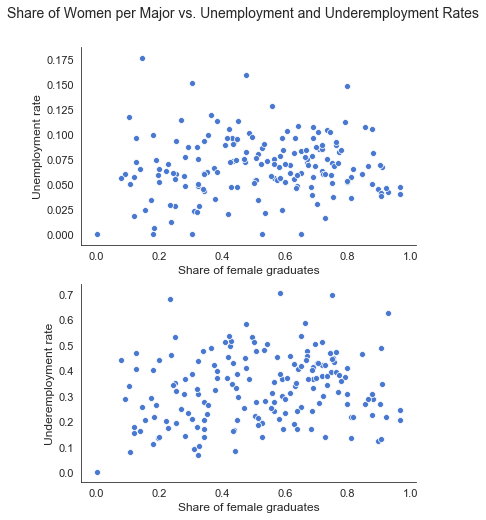

In [29]:
# Compare share of women to unemployment and underemployment rates
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,8))
fig.suptitle("Share of Women per Major vs. Unemployment and Underemployment Rates", fontsize = 14, y = .95)

# Unemployment scatter plot
sns.scatterplot(x = grads_df["ShareWomen"], y = grads_df["Unemployment_rate"], ax = ax1)
ax1.set(xlabel = "Share of female graduates", ylabel = "Unemployment rate")

# Underemployment scatter plot
sns.scatterplot(x = grads_df["ShareWomen"], y = grads_df["Underemployment"], ax = ax2)
ax2.set(xlabel = "Share of female graduates", ylabel = "Underemployment rate")

sns.despine()

**Findings:** There appears to be no correlation between unemployment and underemployment rates per major and share of women graduates.

### Outcomes for Female Graduates

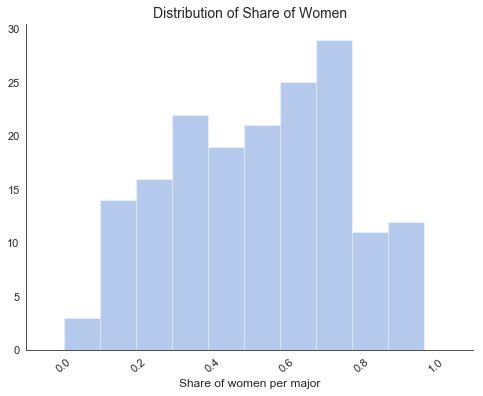

In [40]:
# Share of women histogram
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(grads_df["ShareWomen"], kde = False, bins = 10)
ax.set(xlabel = "Share of women per major", title = "Distribution of Share of Women", xlim = (-0.1, 1.1))
plt.xticks(rotation=40)
sns.despine()

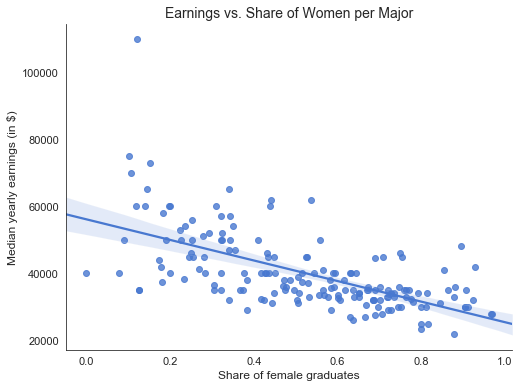

In [30]:
# Compare share of women to earnings
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = grads_df["ShareWomen"], y = grads_df["Median"])
ax.set(xlabel = "Share of female graduates", ylabel = "Median yearly earnings (in $)", \
       title = "Earnings vs. Share of Women per Major")
sns.despine()

**Findings:** Negative correlation: graduates in majority female majors seem to have lower earnings.

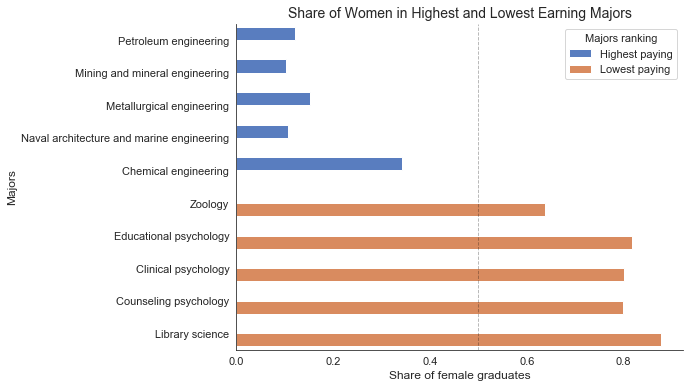

In [31]:
# Compare highest and lowest paying majors in terms of share of women
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(majors_top_bottom_df["ShareWomen"], majors_top_bottom_df["Major"], hue = majors_top_bottom_df["Majors_ranking"])
plt.axvline(.5, linestyle = "dashed", color = "black", linewidth = .9, alpha = .3)
ax.set(xlabel = "Share of female graduates", ylabel = "Majors",
       title = "Share of Women in Highest and Lowest Earning Majors")
ax.legend(title = "Majors ranking")
sns.despine()

**Findings:** The highest paying majors are engineering majors that are majority male. On the other hand, the lowest paying majors are majority female.

In [32]:
# Find median income and share of women per majors category (sorted by income)
major_cat_df = (grads_df.groupby("Major_category")
             .agg({"Median": "median", "ShareWomen" : "median"})
             .sort_values("Median", ascending = False))
major_cat_df.reset_index(inplace=True)

# Keep only 5 highest and 5 lowest paying majors categories
major_cat_df.loc[major_cat_df.index[:5], "Majors_ranking"] = "Highest paying"
major_cat_df.loc[major_cat_df.index[-5:], "Majors_ranking"] = "Lowest paying"
cat_top_bottom_df = pd.concat([major_cat_df.head(), major_cat_df.tail()])

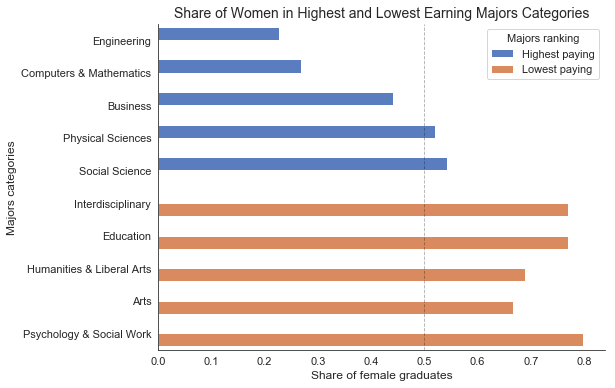

In [33]:
# Compare highest and lowest paying majors categories in terms of share of women
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(cat_top_bottom_df["ShareWomen"], cat_top_bottom_df["Major_category"], 
            hue = cat_top_bottom_df["Majors_ranking"])
plt.axvline(.5, linestyle = "dashed", color = "black", linewidth = .9, alpha = .3)
ax.set(xlabel = "Share of female graduates", ylabel = "Majors categories",
       title = "Share of Women in Highest and Lowest Earning Majors Categories")
ax.legend(title = "Majors ranking")
sns.despine()

**Findings:** The highest paying majors categories tend to be male dominated, while the lowest paying ones are all majority female.

## Women Graduates Time Series Data Analysis

### Data

In [34]:
# Add dataframe of percentage of bachelor's degrees granted to women from 1970 to 2011
women_degrees_df = pd.read_csv("data/bachelors-degrees-women-usa.csv")

# Preview of the dataset
women_degrees_df.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [35]:
women_degrees_df.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


In [36]:
# Check degrees sorted in ascending order by share of women graduates in the last year (2011)
women_degrees_df.sort_values(by = 41, ascending = True, axis = 1)[women_degrees_df["Year"] == 2011]

,Engineering,Computer Science,Physical Sciences,Architecture,Math and Statistics,Business,Social Sciences and History,Agriculture,Biology,Art and Performance,Communications and Journalism,English,Foreign Languages,Psychology,Education,Public Administration,Health Professions,Year
41,17.5,18.2,40.1,42.773438,43.1,48.180418,49.2,50.037182,58.742397,61.2,62.2,68.42673,69.5,76.7,79.432812,81.9,84.8,2011


### Gender Gap in Bachelor's Degrees

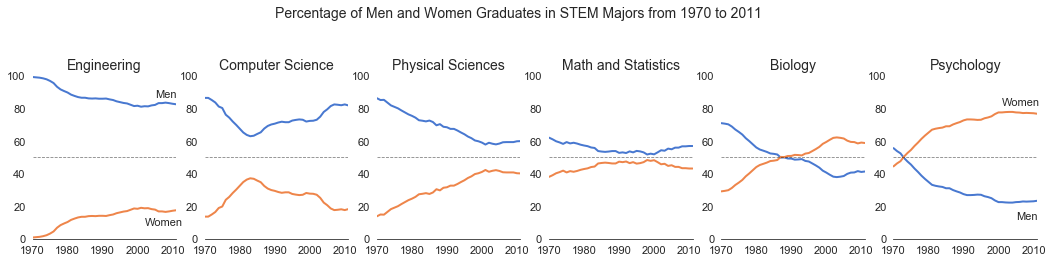

In [37]:
# List of STEM majors categories sorted in ascending order by share of women graduates in the last year (2011)
stem_cat = ["Engineering", "Computer Science", "Physical Sciences", "Math and Statistics", "Biology", "Psychology"]

# Add figure for STEM majors line charts
fig = plt.figure(figsize=(18, 3))
fig.suptitle("Percentage of Men and Women Graduates in STEM Majors from 1970 to 2011", fontsize = 14, y = 1.2)

# Plot line chart for each STEM major
for i in range(0,6):
    ax = fig.add_subplot(1, 6, i+1)
    ax.plot(women_degrees_df["Year"], 100 - women_degrees_df[stem_cat[i]],  label = "Men", linewidth = 2) # Men graduates
    ax.plot(women_degrees_df["Year"], women_degrees_df[stem_cat[i]], label = "Women" , linewidth = 2) # Women graduates
    ax.set_xlim(1970, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cat[i])
    plt.axhline(50, linestyle = "dashed", color = "black", linewidth = .8, alpha = .5)
    ax.locator_params(nbins = 5, axis = "x")

    # Add legend for first and last subplots 
    if i == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif i == 5:
        ax.text(2005, 12, "Men")
        ax.text(2001, 82, "Women")
        
sns.despine(left=True)

**Findings:** The share of women graduates in STEM majors has increased from 1970 to 2011 in most categories.

However, 4 out of the 6 STEM majors categories are still majority male. The other two majors, biology and psychology, are currently majority female.

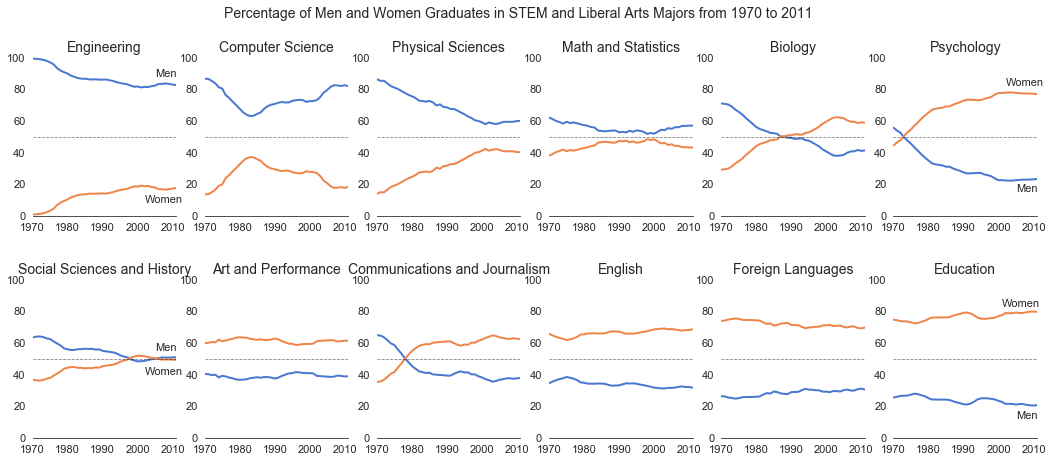

In [38]:
# Compare STEM time series to liberal arts time series
lib_arts_cat = ["Social Sciences and History", "Art and Performance", "Communications and Journalism", "English",
                "Foreign Languages", "Education"]

# Add figure for STEM majors line charts
fig = plt.figure(figsize=(18, 7))
fig.suptitle("Percentage of Men and Women Graduates in STEM and Liberal Arts Majors from 1970 to 2011", fontsize = 14)
plt.subplots_adjust(hspace = .4)

for i in range(0,6):
    # Plot line chart for each STEM major
    ax = fig.add_subplot(2, 6, i+1)
    ax.plot(women_degrees_df["Year"], 100 - women_degrees_df[stem_cat[i]],  label = "Men", linewidth = 2) # Men graduates
    ax.plot(women_degrees_df["Year"], women_degrees_df[stem_cat[i]], label = "Women" , linewidth = 2) # Women graduates
    ax.set_xlim(1970, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cat[i])
    plt.axhline(50, linestyle = "dashed", color = "black", linewidth = .8, alpha = .5)
    ax.locator_params(nbins = 5, axis = "x")

    # Plot line chart for each liberal arts major
    ax = fig.add_subplot(2, 6, i+7)
    ax.plot(women_degrees_df["Year"], 100 - women_degrees_df[lib_arts_cat[i]],  label = "Men", linewidth = 2) # Men graduates
    ax.plot(women_degrees_df["Year"], women_degrees_df[lib_arts_cat[i]], label = "Women" , linewidth = 2) # Women graduates
    ax.set_xlim(1970, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cat[i])
    plt.axhline(50, linestyle = "dashed", color = "black", linewidth = .8, alpha = .5)
    ax.locator_params(nbins = 5, axis = "x")
    
    # Add legend for first and last subplots 
    if i == 0:
        ax.text(2005, 228, "Men")
        ax.text(2002, 148, "Women")
        ax.text(2005, 55, "Men")
        ax.text(2002, 40, "Women")
    elif i == 5:
        ax.text(2005, 155, "Men")
        ax.text(2002, 222, "Women")
        ax.text(2005, 12, "Men")
        ax.text(2001, 83, "Women")
        
sns.despine(left=True)

**Findings:** Most liberal arts majors were majority female even in 1970, contrary to STEM majors.

## Conclusion

**Insights:**

Most college graduates earn between <span>&#36;</span>30,000 and <span>&#36;</span>40,000 out of college. However, engineering majors tend to earn much more, reaching more than <span>&#36;</span>100,000.

Majors' earning potential does not seem to have an impact on graduates' unemployment rate, but it appears to affect underemployment. 

Graduates from majority female majors appear to have lower earnings. This is in part due to the gender gap in bachelor's degrees that impacts female graduates' earnings. Indeed, the highest paying majors, namely STEM ones, are majority male. On the other hand, lower paying liberal arts majors tend to be majority female. For instance, computer science majors were 80% male as of 2011 while education majors were 80% female.